# Pre-Analysis of the audios files

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
from utils.format_helpers import analyze_audio_files

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Raw Audio Analysis

In [3]:
directories = ["../data/OBE1","../data/OBE2","../data/Compassion"]
extensions = ["m4a","wav","mp4"]

df = analyze_audio_files(directories, extensions)

# Sort by alphabetical order of experiment names
df = df.sort_values(by="Experiment", ascending=True)
df.to_csv("outputs/audio_data.csv", index=False)
df

,File Name,Format,Id,Duration,Duration_timedelta,Duration_sec,Experiment
81,S313,.m4a,313,00:09:36,0 days 00:09:36.620000,576.62,Compassion
79,S306,.m4a,306,00:08:50,0 days 00:08:50.710000,530.71,Compassion
78,S305con,.m4a,305,00:01:41,0 days 00:01:41.100000,101.10,Compassion
77,S304,.m4a,304,00:07:05,0 days 00:07:05.920000,425.92,Compassion
76,S303man,.m4a,303,00:04:34,0 days 00:04:34.920000,274.92,Compassion
...,...,...,...,...,...,...,...
44,S212_2,.m4a,212,00:07:54,0 days 00:07:54.580000,474.58,OBE2
45,S213_1,.m4a,213,00:02:12,0 days 00:02:12.950000,132.95,OBE2
46,S213_2,.m4a,213,00:04:25,0 days 00:04:25.090000,265.09,OBE2
32,S208-2,.m4a,208,00:06:30,0 days 00:06:30.590000,390.59,OBE2


In [4]:
# Group by 'Experiment' and sum durations
print("Duration by Experiement:\n",df.groupby('Experiment')['Duration_timedelta'].sum())
print("\nTotal Duration:\n",df['Duration_timedelta'].sum())

Duration by Experiement:
 Experiment
Compassion   0 days 01:00:53.870000
OBE1         0 days 01:22:57.510000
OBE2         0 days 04:55:58.040000
Name: Duration_timedelta, dtype: timedelta64[ns]

Total Duration:
 0 days 07:19:49.420000


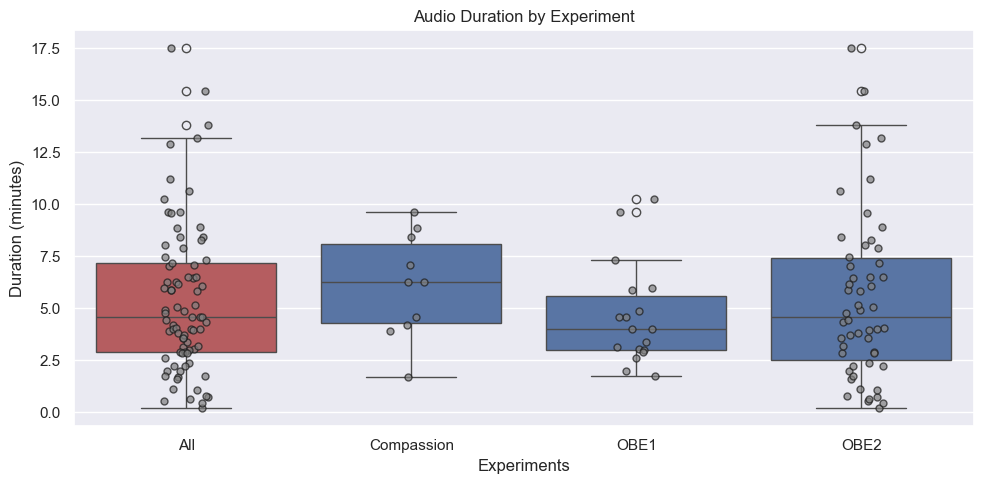

In [5]:
# Add a new row for the "All" category
df_all = df.copy()
df_all['Experiment'] = 'All'

# Concatenate the original data with the "All" data
df_combined = pd.concat([df_all, df])
default_palette = sns.color_palette("deep")  
palette = {experiment: (default_palette[0] if experiment != 'All' else default_palette[3]) for experiment in df_combined['Experiment'].unique()}

# Add a new column for duration in minutes
df_combined['Duration_min'] = df_combined['Duration_sec'] / 60

# Plot
plt.figure(figsize=(10, 5))
sns.boxplot(x='Experiment', y='Duration_min', data=df_combined, palette=palette, hue='Experiment')
sns.stripplot(x='Experiment', y='Duration_min', data=df_combined, alpha=0.7, edgecolor='k', color='gray',linewidth=1)

# Set titles and labels
plt.title('Audio Duration by Experiment')
plt.xlabel('Experiments')
plt.ylabel('Duration (minutes)')

plt.tight_layout()
plt.savefig('images/audio_duration.png', dpi=600)
plt.show()

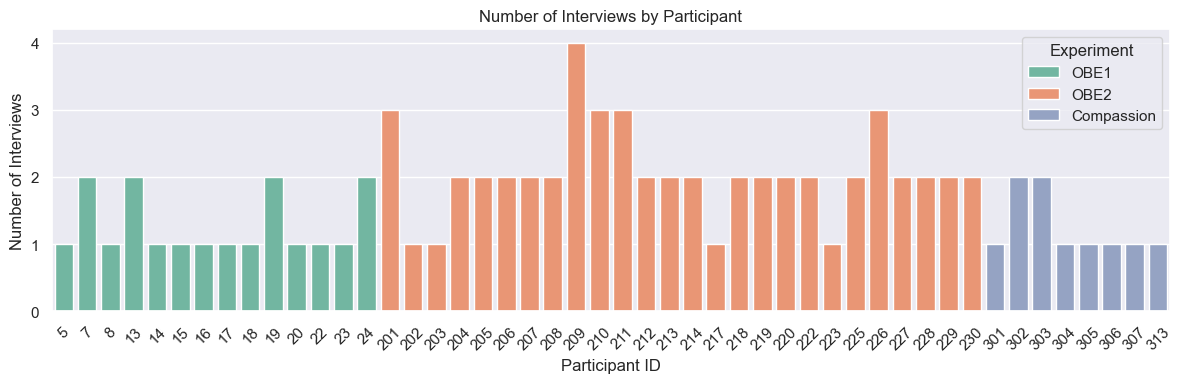

In [6]:
plt.figure(figsize=(12, 4))
sns.countplot(x='Id', hue='Experiment', data=df, palette='Set2')

plt.title('Number of Interviews by Participant')
plt.xlabel('Participant ID')
plt.ylabel('Number of Interviews')
plt.xticks(rotation=45)
plt.legend(title='Experiment')
plt.yticks(range(0, int(df['Id'].value_counts().max()) + 1))

plt.tight_layout()
plt.savefig('images/interviews_by_participant.png', dpi=600)
plt.show()

In [7]:
# Count the number of file name (Interviews) per experiment
df_count = df.groupby('Experiment')['File Name'].nunique().reset_index()
display(df_count)
print("Total number of interviews:", df_count.sum().values[1])

,Experiment,File Name
0,Compassion,10
1,OBE1,18
2,OBE2,54


Total number of interviews: 82


In [8]:
# Count the number of ID (participant) per experiment
df_count = df.groupby('Experiment')['Id'].nunique().reset_index()
df_count

,Experiment,Id
0,Compassion,8
1,OBE1,14
2,OBE2,26
